# Chapter 9: Introduction to Deep Learning
___

## 1. Neural Network

### 1.1 Neuron

A neuron is the building block of the neural network, which performs a dot product with the input and its weights, adds the bias and applies the non-linear transformation (or **activation function**), in this case the sigmoid $\sigma(z)=1/(1+e^{-z})$. We will go into more details about different activation functions at the end of this section.

<img src="images/neuron_model.jpeg" width=60%>

$$
\begin{array}{lcl}
z &=& \mathbf{w}^T \mathbf{x} \\
y &=& \left( 1+\exp(-z) \right)^{-1}
\end{array}
$$

In [1]:
class Neuron(object):
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
        
    def forward(self, input):
        z = np.sum(self.weights * inputs) + self.bias
        return 1.0 / (1.0 + np.exp(-z))

## 1.2 Activation functions

Every activation function takes a scalar as input and performs a certain mathematical operation on it. In practice, there are several popular activation functions:

- **Sigmoid function**: $\sigma(z) = 1 / (1 + e^{-z})$
![](images/sigmoid.jpeg)
- Two major drawbacks of Sigmoid function
    1. Sigmoids saturate and kill gradients
    2. Sigmoid ouputs are not zero-centered.

- **tanh function**: $f(z) = 2\sigma(z) - 1$
![](images/tanh.jpeg)

- **ReLU (Rectified Linear Unit, 修正线性单元)**: $f(z) = \max(0, z)$
![](images/relu.jpeg)
- Pros and cons of ReLU:
    * Accelerated convergence of SGD compared to sigmoid/tanh.
    * Simpler computation of linear thresholding compared to the expensive exponential for sigmoid/tanh.
    * No saturation.
    * Fragile to be "dead" during training.
    
- **Leaky ReLU**: $f(z) = \alpha z \mathbf{I}(z < 0) + z \mathbf{I}(z \ge 0)$
    * $\alpha$ is a very small constant.
    * $\mathbf{I}(\cdot)$ is an indicator function.
    * The result is not always consistent.

- **Maxout**: $f(x) = \max(\mathbf{w}_1^T \mathbf{x} + b_1, \mathbf{w}_2^T \mathbf{x} + b_2)$
    * Extension to ReLU and Leaky-ReLU
    * Pros: Linear regime, no saturation, no "dying" threat
    * Cons: doubling the number of parameters.
    
#### Take-home messages

Use the ReLU non-linearity, be careful with your learning rates and possibly monitor the fraction of "dead" units in a network. If this concerns you, give Leaky ReLU or Maxout a try. Never use sigmoid. Try tanh, but expect it to work worse than ReLU/Maxout.

### 1.3  Neural network architectures

A common neural network is a hierarchical strucuture with neurons organized as multiple layers. For regular neural networks, the most common layer type is the **fully-connected (FC, 全连接) layer** in which neurons between two adjacent layers are fully pairwise connected, but neurons within a single layer share no connections. 

Below are two example Neural Network topologies that use a stack of fully-connected layers:

#### Two-layer neural network
<img src="images/two-layer-neural_net.jpeg" width=40%>
This two-layer neural net has $4 + 2 = 6$ neurons (not counting the inputs),  $[3 \times 4] + [4 \times 2] = 20$ weights and $4 + 2 = 6$ biases, for a total of $26$ learnable parameters.

#### Three-layer neural network
<img src="images/three-layer-neural_net.jpeg" width=50%>
This three-layer neural net has $4 + 4 + 1 = 9$ neurons (not counting the inputs),  $[3 \times 4] + [4 \times 4] + [4 \times 1] = 32$ weights and $4 + 4 + 1 = 9$ biases, for a total of $41$ learnable parameters.

### 1.4 Feed-forward computation

For the above three-layer neural net:
- The input is $\mathbf{x} \in \mathbb{R}^3$
- The weights between the input layer and the first hidden layer is $\mathbf{W}_1 \in \mathbb{R}^{4 \times 3}$; and the biases between these two layers is $\mathbf{b}_1 \in \mathbb{R}^4$ 
- The weights between the two hidden layers is $\mathbf{W}_2 \in \mathbb{R}^{4 \times 4}$; and the biases between these two hidden layers is $\mathbf{b}_2 \in \mathbb{R}^4$
- The weights between the second hidden layer and the output layer is $\mathbf{W}_3 \in \mathbb{R}^{1 \times 4}$; and the bias is $\mathbf{b} \in \mathbb{R}$.

The output for the first hidden layer is:
$$
\mathbf{h}_1 = \sigma \left(\mathbf{W}_1 \mathbf{x} + \mathbf{b}_1 \right)
$$
The output for the second hidden layer is:
$$
\mathbf{h}_2 = \sigma \left(\mathbf{W}_2 \mathbf{h}_1 + \mathbf{b}_2 \right)
$$
The output for the output layer is:
$$
\mathbf{o} = \sigma \left(\mathbf{W}_3 \mathbf{h}_2 + \mathbf{b}_3 \right)
$$

In [3]:
import numpy as np

# forward-pass of a 3-layer neural network:
f = lambda x: 1.0/(1.0 + np.exp(-x)) # activation function (use sigmoid)
x = np.random.randn(3, 1) # random input vector of three numbers (3x1)
W1 = np.random.randn(4, 3)
b1 = np.random.randn(4, 1)
h1 = f(np.dot(W1, x) + b1) # calculate first hidden layer activations (4x1)
W2 = np.random.randn(4, 4)
b2 = np.random.randn(4, 1)
h2 = f(np.dot(W2, h1) + b2) # calculate second hidden layer activations (4x1)
W3 = np.random.randn(1, 4)
b3 = np.random.randn(1)
out = np.dot(W3, h2) + b3 # output neuron (1x1)
print out

[[ 2.3012188]]


## 1.5 Setting numbers of layers and the sizes

If we increase the size (number of hidden nodes) and the number of layers, the **capacity能力** of the neural network also increases.
<img src="images/layer_sizes.jpeg" width=80%>

However, increasing the size and the number of layer may result in **overfitting 过拟合** (i.e., bad generalization 泛化能力差).

However, <font color="red">you should not be using smaller networks to avoid overfitting</font>. Instead, you should use as big of a neural network as your computational budget allows, and pose other **regularization 正则化**  (especially **dropout 神经元失活**) to control overfitting.

### 1.6 Setting up the data and the model

- The recommended preprocessing is to conduct the **mean-subtraction** to center the data to zero, and do **normalization** of its scale to [-1, 1] along each feature.
- **Initialize the weights** by drawing them from a gaussian distribution with standard deviation of $2/n$ - $\sqrt{2/n}$, where $n$ is the number of inputs to the neuron.
- Use L2 regularization and dropout (the inverted version).
- Use batch normalization.

### 1.7 Case study

In this section we'll walk through a complete implementation of a toy Neural Network in 2-D space. We'll first implement a simple linear classifier and then extend the code to a 2-layer Neural Network. As we'll see, this extension is surprisingly simple and very few changes are necessary.

#### (1) Generating a spiral dataset

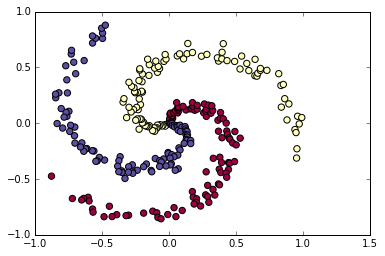

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in xrange(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)

For this data set:
- $\mathbf{X} \in \mathbb{R}^{300 \times 2}$;
- The weight matrix $\mathbf{W} \in \mathbb{R}^{2 \time 3}$;
- The output score $\mathbf{Z} = \mathbf{XW}  + \mathbf{b} \in \mathbb{R}^{300 \times 3}$
- The output probabilities for the $i$-th example belonging to class $k=\{1, 2, 3\}$ is: 
$$
p_{ik} = \frac{\exp(ik)}{\sum_{j=1}^3 \exp(z_{ij})}
$$
- The label for the $i$-th example is $y_i \in \{1, 2, 3\}$
- We use **cross-entropy loss (交叉熵损失)** to evaluate the classifier
$$
L_i = \log(p_{iy_i})
$$
- And the final average cross-entropy loss with regularization term is:
$$
L = \frac{1}{300} \sum_{i=1}^{300} L_i + \frac{1}{2} \lambda \sum_k \sum_l w_{k,l}^2
$$
- Then we can compute the gradient of $L$ with respect to $\mathbf{Z}$, $\mathbf{W}$ and $\mathbf{b}$.

#### (2) Data preprocessing

Normally we would want to preprocess the dataset so that each feature has zero-mean and unit standard deviation, but in this case the features are already in a nice range from -1 to 1, so we skip this step.

#### (3) Training a softmax linear classifier

First we need to initiate the parameters:

In [5]:
# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

With the parameters, compute the class scores: 

In [6]:
# compute class scores for a linear classifier
scores = np.dot(X, W) + b

Here the array `scores` will have size $[300 \times 3]$, where each row gives the class scores corresponding to the 3 classes (blue, red, yellow).

Using the scores, we can compute the loss for optimization:

In [11]:
# some hyperparameters
step_size = 1e-0
reg = 1e-3               # regularization strength $\lambda$

# gradient descent loop
num_examples = X.shape[0]
for i in xrange(400):
    
    # evaluate class scores, [N x K]
    scores = np.dot(X, W) + b
    
    # compute the class prob
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
    
    
    # Compute the loss average cross-entropy loss and regularization
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W)
    loss = data_loss + reg_loss
    
    if i % 10 == 0:
        print "Iteration %d: loss %f" %(i, loss)
        
    # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples), y] -= 1
    dscores /= num_examples
    
    # backpropagate the gradient to the parameters  (W, b)
    dW = np.dot(X.T, dscores)
    db = np.sum(dscores, axis=0, keepdims=True)
    
    dW += reg*W  # regularization gradient
    
    # Perform a parameter update
    W += -step_size * dW
    b += -step_size * db

Iteration 0: loss 0.762615
Iteration 10: loss 0.762594
Iteration 20: loss 0.762578
Iteration 30: loss 0.762567
Iteration 40: loss 0.762559
Iteration 50: loss 0.762553
Iteration 60: loss 0.762549
Iteration 70: loss 0.762546
Iteration 80: loss 0.762543
Iteration 90: loss 0.762542
Iteration 100: loss 0.762540
Iteration 110: loss 0.762540
Iteration 120: loss 0.762539
Iteration 130: loss 0.762538
Iteration 140: loss 0.762538
Iteration 150: loss 0.762538
Iteration 160: loss 0.762538
Iteration 170: loss 0.762537
Iteration 180: loss 0.762537
Iteration 190: loss 0.762537
Iteration 200: loss 0.762537
Iteration 210: loss 0.762537
Iteration 220: loss 0.762537
Iteration 230: loss 0.762537
Iteration 240: loss 0.762537
Iteration 250: loss 0.762537
Iteration 260: loss 0.762537
Iteration 270: loss 0.762537
Iteration 280: loss 0.762537
Iteration 290: loss 0.762537
Iteration 300: loss 0.762537
Iteration 310: loss 0.762537
Iteration 320: loss 0.762537
Iteration 330: loss 0.762537
Iteration 340: loss 0.762

now we can evaluate the **training set accuracy**.

In [12]:
# evaluate training set accuracy
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print 'training accuracy: %.2f' % (np.mean(predicted_class == y))

training accuracy: 0.52


And this is the diagram of classification margins:
<img src="images/spiral_linear.png" width=50%>

## <font color="red">Exercise 1</font>
1. The training accuracy is so low for the above linear classifier - softmax, can you improve it by including more basis functions, like second-order, or even the third-order terms into the model?

2. In practice, we often use cross-validation (CV) to test the accuracy of the classifiers. Here, try to use 5-fold cross validation to compute the prediction accuracy of this classifier.

#### (4) Training a 2-layer neural network

In [13]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in xrange(10000):
  
  # evaluate class scores, [N x K]
  hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
  scores = np.dot(hidden_layer, W2) + b2
  
  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # compute the loss: average cross-entropy loss and regularization
  corect_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(corect_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
  loss = data_loss + reg_loss
  if i % 1000 == 0:
    print "iteration %d: loss %f" % (i, loss)
  
  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
  dW2 = np.dot(hidden_layer.T, dscores)
  db2 = np.sum(dscores, axis=0, keepdims=True)
  # next backprop into hidden layer
  dhidden = np.dot(dscores, W2.T)
  # backprop the ReLU non-linearity
  dhidden[hidden_layer <= 0] = 0
  # finally into W,b
  dW = np.dot(X.T, dhidden)
  db = np.sum(dhidden, axis=0, keepdims=True)
  
  # add regularization gradient contribution
  dW2 += reg * W2
  dW += reg * W
  
  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db
  W2 += -step_size * dW2
  b2 += -step_size * db2

iteration 0: loss 1.098724
iteration 1000: loss 0.312690
iteration 2000: loss 0.256362
iteration 3000: loss 0.249350
iteration 4000: loss 0.248308
iteration 5000: loss 0.248183
iteration 6000: loss 0.251487
iteration 7000: loss 0.248855
iteration 8000: loss 0.246873
iteration 9000: loss 0.247030


In [14]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print 'training accuracy: %.2f' % (np.mean(predicted_class == y))

training accuracy: 0.98


<img src="images/spiral_net.png" width=60%>

## <font color="red">Exercise 2</font>

Do you think we need to add more layer to improve the performance, although it seems that it is already very good? To validate the model, you'd better use a 5-fold cross-validation to obtain the prediction accuracy.

## 2. Convolutional Neural Network (CNN) 

## 3. Recurrent Neural Network (RNN)